Features and their types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object


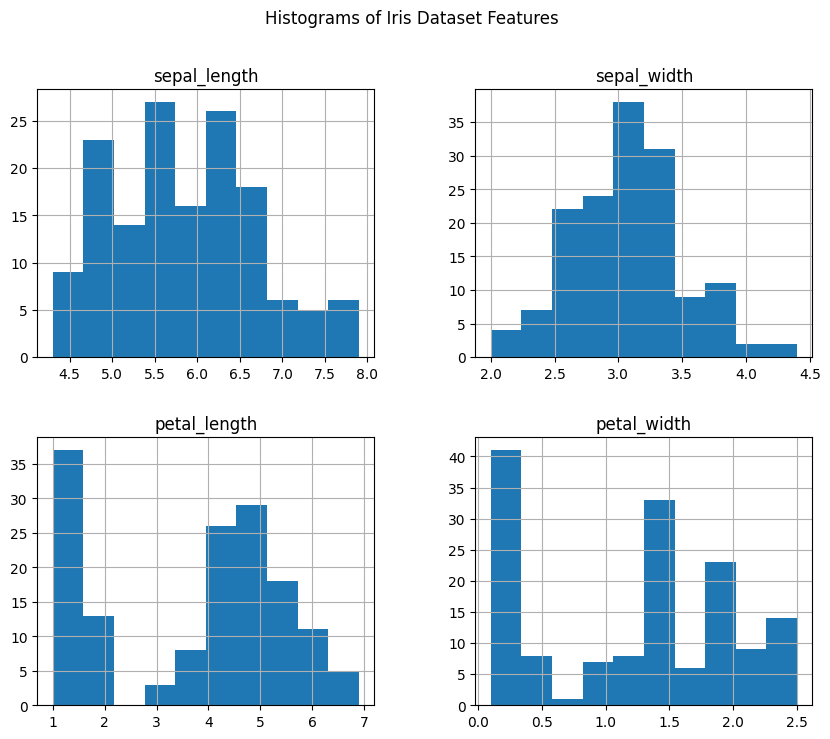

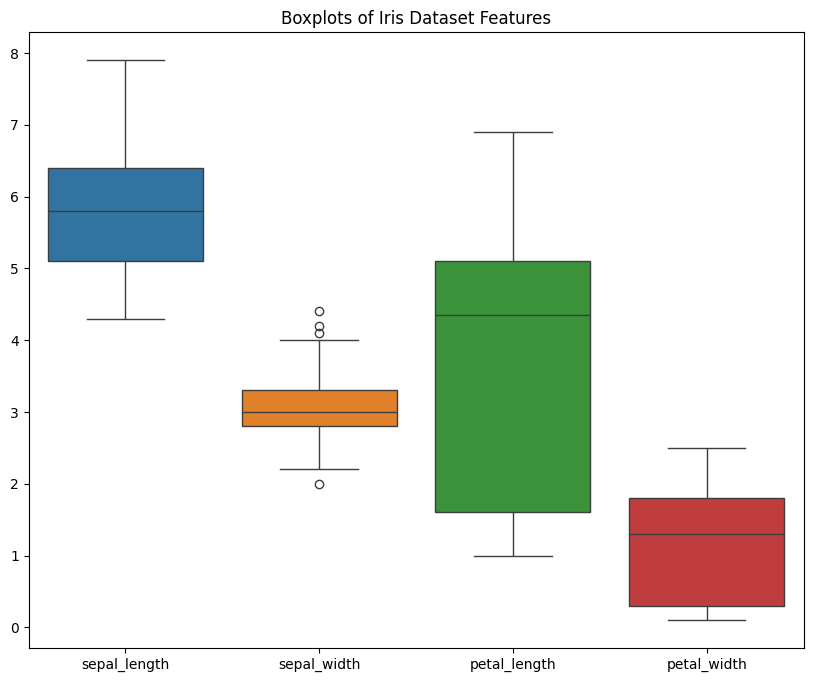

Outliers:
Feature: sepal_width
    sepal_length  sepal_width  petal_length  petal_width            class
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_data = pd.read_csv(iris_url, names=iris_columns)

# 1. List down the features and their types
features_types = iris_data.dtypes
print("Features and their types:")
print(features_types)

# 2. Create a histogram for each feature
iris_data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Iris Dataset Features")
plt.show()

# 3. Create a boxplot for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_data)
plt.title("Boxplots of Iris Dataset Features")
plt.show()

# 4. Compare distributions and identify outliers
# Identify outliers using boxplot
outliers = {}
for column in iris_data.columns[:-1]:  # excluding the 'class' column
    Q1 = iris_data[column].quantile(0.25)
    Q3 = iris_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = iris_data[(iris_data[column] < lower_bound) | (iris_data[column] > upper_bound)]

print("Outliers:")
for column, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"Feature: {column}")
        print(outlier_data)
